# <H1 style="text-align: center;"><b>K-Means Clustering</b></p>

## Introducción a K-Means Clustering

### ¿Qué es K-Means?

**K-Means** es un algoritmo de **aprendizaje no supervisado** utilizado para agrupar datos en **\( k \)** conjuntos o clusters. Su objetivo es minimizar la variabilidad dentro de cada cluster, asegurando que los puntos dentro de un grupo sean lo más similares posible.

---

### ¿Cómo funciona K-Means?

El algoritmo sigue estos pasos iterativos:

1. **Inicialización:**  
   - Se eligen aleatoriamente \( k \) centroides dentro del espacio de datos.  

2. **Asignación de puntos:**  
   - Cada punto se asigna al **centroide más cercano** (según una métrica de distancia, como la euclidiana).  

3. **Recalculación de centroides:**  
   - Se actualizan los centroides tomando el **promedio de todos los puntos** asignados a cada cluster.  

4. **Repetición:**  
   - Se repiten los pasos 2 y 3 hasta que los centroides dejan de cambiar significativamente o se alcanza un número máximo de iteraciones.  

---


## **Implementación del algoritmo a los datos sintéticos**

In [1]:
# Cargamos librerias y datos
import pandas as pd
import numpy as np
import kmeans
import graphers as grph
import metric
import analytics

data_3d = pd.read_csv("data/data_3d.csv")
data_2d = pd.read_csv("data/data_2d.csv")

In [2]:
# Estudio estadistico 2D
print("Estudio estadistico de los datos 2D:")
print(data_2d.describe())

Estudio estadistico de los datos 2D:
                x           y      label
count  500.000000  500.000000  500.00000
mean    -0.021084   -0.018481    3.00000
std      2.709409    2.739144    1.41563
min     -4.583528   -4.136309    1.00000
25%     -2.881481   -2.852890    2.00000
50%      0.063694   -0.063037    3.00000
75%      2.794664    2.877321    4.00000
max      4.166031    4.479313    5.00000


In [3]:
# Estudio estadistico 3D

print("Estudio estadistico de los datos 3D:")
print(data_3d.describe())

Estudio estadistico de los datos 3D:
                x           y           z      label
count  500.000000  500.000000  500.000000  500.00000
mean     0.007135    0.012954    1.210683    3.00000
std      2.767796    2.706724    1.549598    1.41563
min     -4.076058   -4.533494   -1.900689    1.00000
25%     -2.846464   -2.810216   -0.068054    2.00000
50%      0.025454    0.098319    0.415523    3.00000
75%      2.903804    2.814452    2.868339    4.00000
max      4.058567    4.185694    4.135517    5.00000


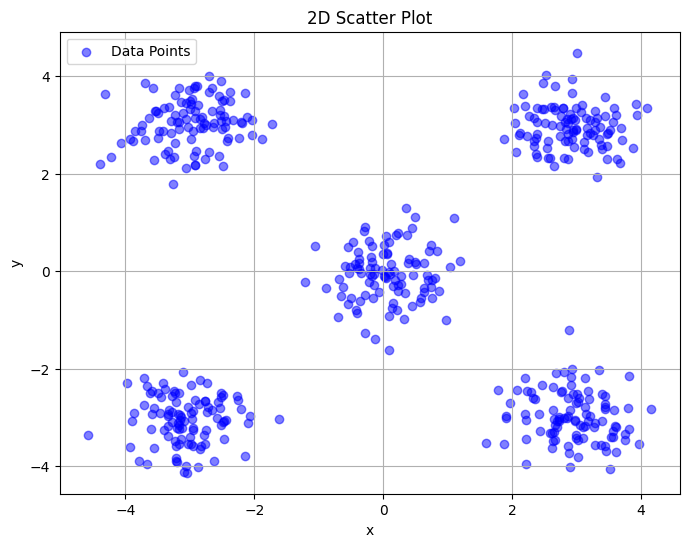

In [4]:
# Grafica de los datos 2D
grph.scatter_2d(data_2d)

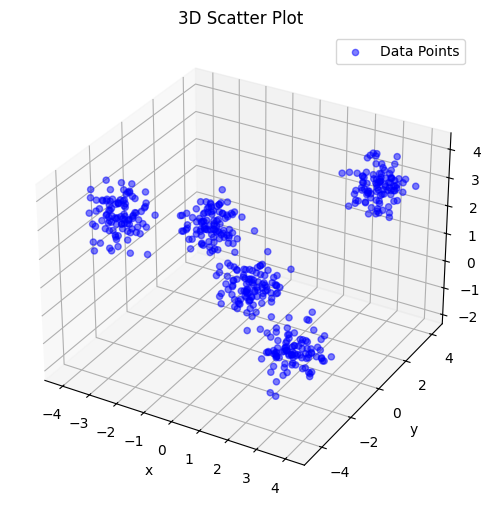

In [5]:
# Grafica de los datos 3D
grph.scatter_3d(data_3d)

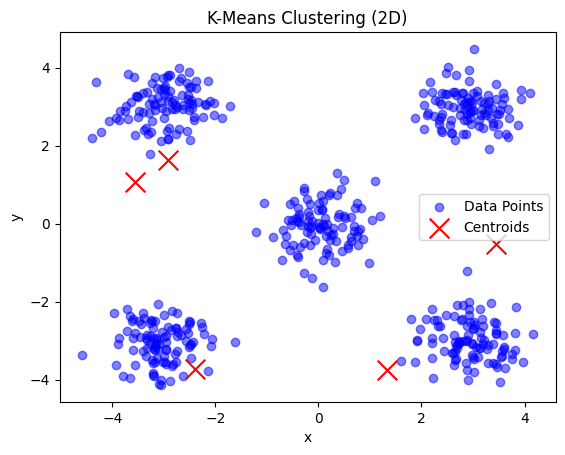

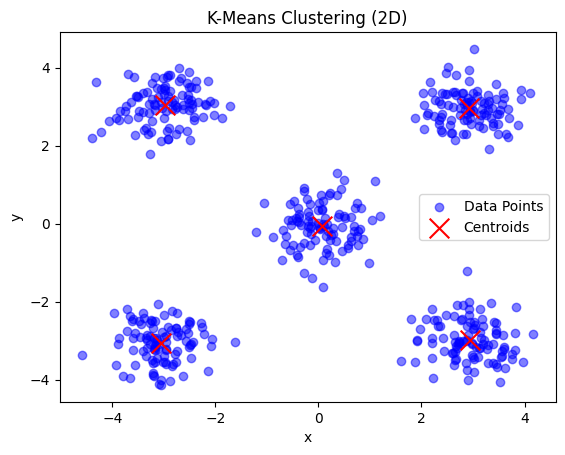

In [6]:
# Implementacion de K-Means en los datos 2D
data_2d_to_fit = data_2d.iloc[:, :-1]
k = 5
seed = 41
metrica = metric.euclidean

init_centroids = kmeans.centroids(data_2d_to_fit, k, seed)
centroids, clusters = kmeans.Kmeans(data_2d_to_fit, k, metrica, seed)  # Ahora obtenemos clusters
grph.plot_2d(data_2d_to_fit, init_centroids)
grph.plot_2d(data_2d_to_fit, centroids)

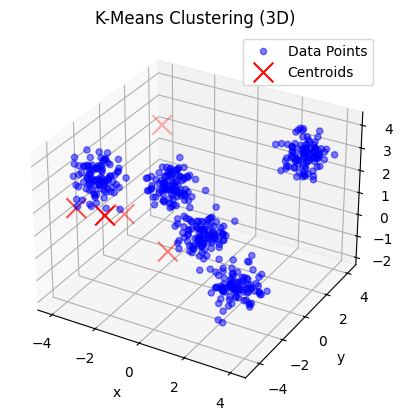

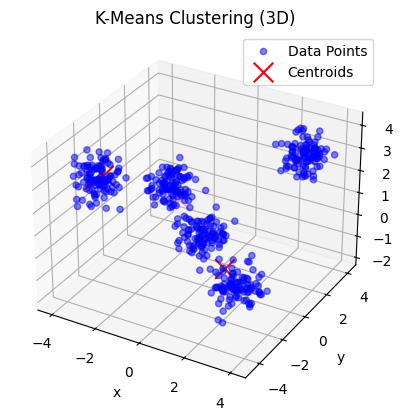

In [7]:
# Implementacion de K-Means en los datos 3D
data_3d_to_fit = data_3d.iloc[:, :-1]
k = 5
seed = 41
metrica = metric.euclidean

init_centroids = kmeans.centroids(data_3d_to_fit, k, seed)
centroids, clusters = kmeans.Kmeans(data_3d_to_fit, k, metrica, seed)  # Ahora obtenemos clusters
grph.plot_3d(data_3d_to_fit, init_centroids)
grph.plot_3d(data_3d_to_fit, centroids)

## **Análisis de Resultados en K-Means con Múltiples Métricas**

### **¿Cómo se analizaron los resultados?**  
Para evaluar el desempeño del algoritmo **K-Means**, realizamos un análisis de los resultados obtenidos con distintas métricas y distintos centroides iniciales. 

Para cada métrica utilizada, calculamos la inercia propia del clustering y la inercia euclidiana para comparación. Finalmente, graficamos los resultados para visualizar diferencias entre métricas.

---

### **¿Qué es la Inercia en K-Means?**  
La **inercia** es la suma de las p-normas a la p potencia de cada punto a su centroide asignado. Matemáticamente, se define como:

$$
\text{Inercia} = \sum_{i=1}^{k} \sum_{x \in C_i} ||x-\mu_i||_{q}^{q}
$$

Donde:
- $k$ es el número de clusters.  
- $C_i$ representa el conjunto de puntos asignados al cluster $i$.  
- $\mu_i$ es el centroide del cluster $i$.  
- $||x-\mu_i||_{q}^{q}$ es la distancia inducida por la norma q entre el punto $x$ y su centroide.  

La inercia nos indica qué tan compactos están los clusters. Un valor menor sugiere clusters más compactos, aunque valores muy pequeños pueden significar sobreajuste.

---

### **Métricas de Distancia Utilizadas en K-Means**

#### **1. Distancia Euclidiana**
La distancia euclidiana entre dos puntos $ x, y \in \mathbb{R}^n $ se define como:

$$
d_{\text{Euclideana}}(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

#### **2. Distancia Manhattan (L1)**
También conocida como la distancia de la "suma de diferencias absolutas":

$$
d_{\text{Manhattan}}(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

#### **3. Distancia de Chebyshev**
Es la distancia máxima en cualquier dimensión:

$$
d_{\text{Chebyshev}}(x, y) = \max_{i} |x_i - y_i|
$$

#### **4. Distancia de Mahalanobis**
Toma en cuenta la correlación entre variables y se define como:

$$
d_{\text{Mahalanobis}}(x, y) = \sqrt{(x - y)^T A (x - y)}
$$

donde \( A \) es una matriz definida positiva.

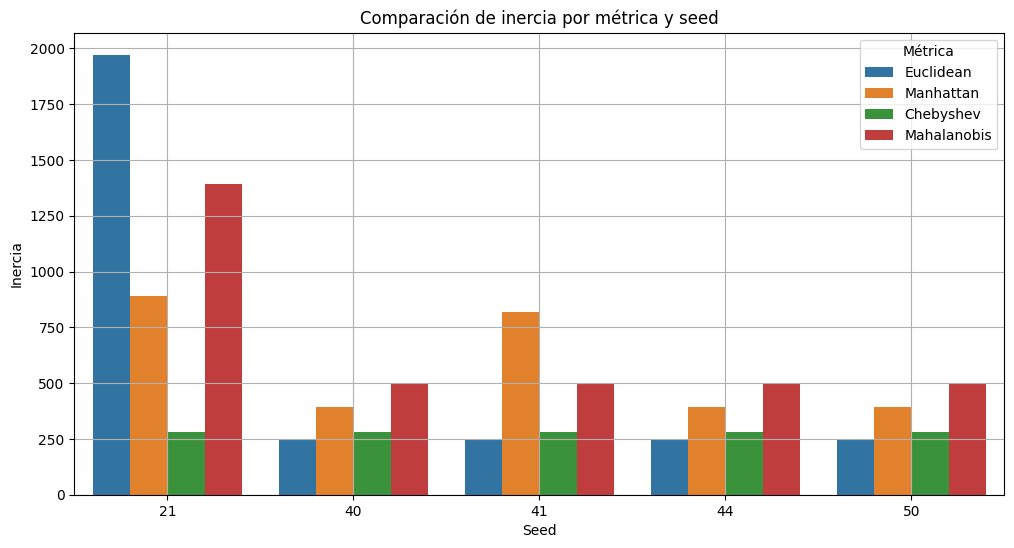

In [10]:
# Analisis 2d
k = 5
seeds = [41,40,21,44,50]
A = np.array([[2, 1], 
              [1, 2]])
metrica = metric.euclidean

analisis = analytics.analysis_multiple_seeds(data_2d_to_fit, k, A, seeds)
analytics.compare_inertia_by_seed(analisis)

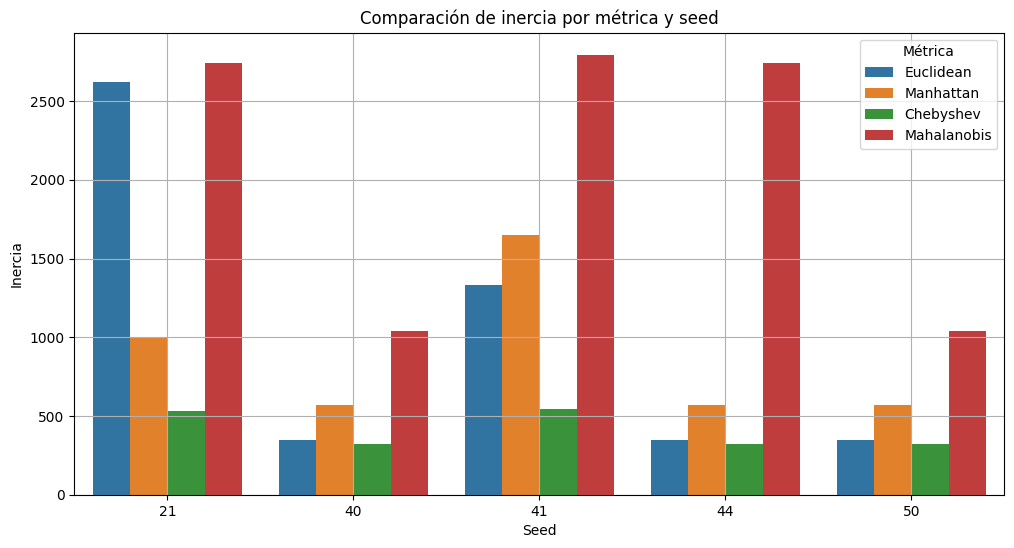

In [11]:
k = 5
seeds = [41,40,21,44,50]
A = np.array([
    [3, 1, 1],
    [1, 3, 1],
    [1, 1, 3]
])

analisis = analytics.analysis_multiple_seeds(data_3d_to_fit, k, A, seeds)
analytics.compare_inertia_by_seed(analisis)